<a href="https://colab.research.google.com/github/MhammadRezaValiYari/GoldTransectionAnalysisLinearRegression/blob/main/GoldTransectionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import essesional library

In [22]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import sklearn.model_selection
import pickle

read data from drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
drive.mount('/content/drive', force_remount=True)
!ls '/content/drive/MyDrive/FINAL_USO.csv'
data = pd.read_csv('/content/drive/MyDrive/FINAL_USO.csv')
df = pd.DataFrame(data)
df.head(2)

Mounted at /content/drive
/content/drive/MyDrive/FINAL_USO.csv


,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.68,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.68,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800


In [4]:
df['Time'] = np.arange(len(df.index))

In [5]:
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,Time
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.68,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700,0
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.68,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800,1


<ipython-input-17-c5fb9ed6667e>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


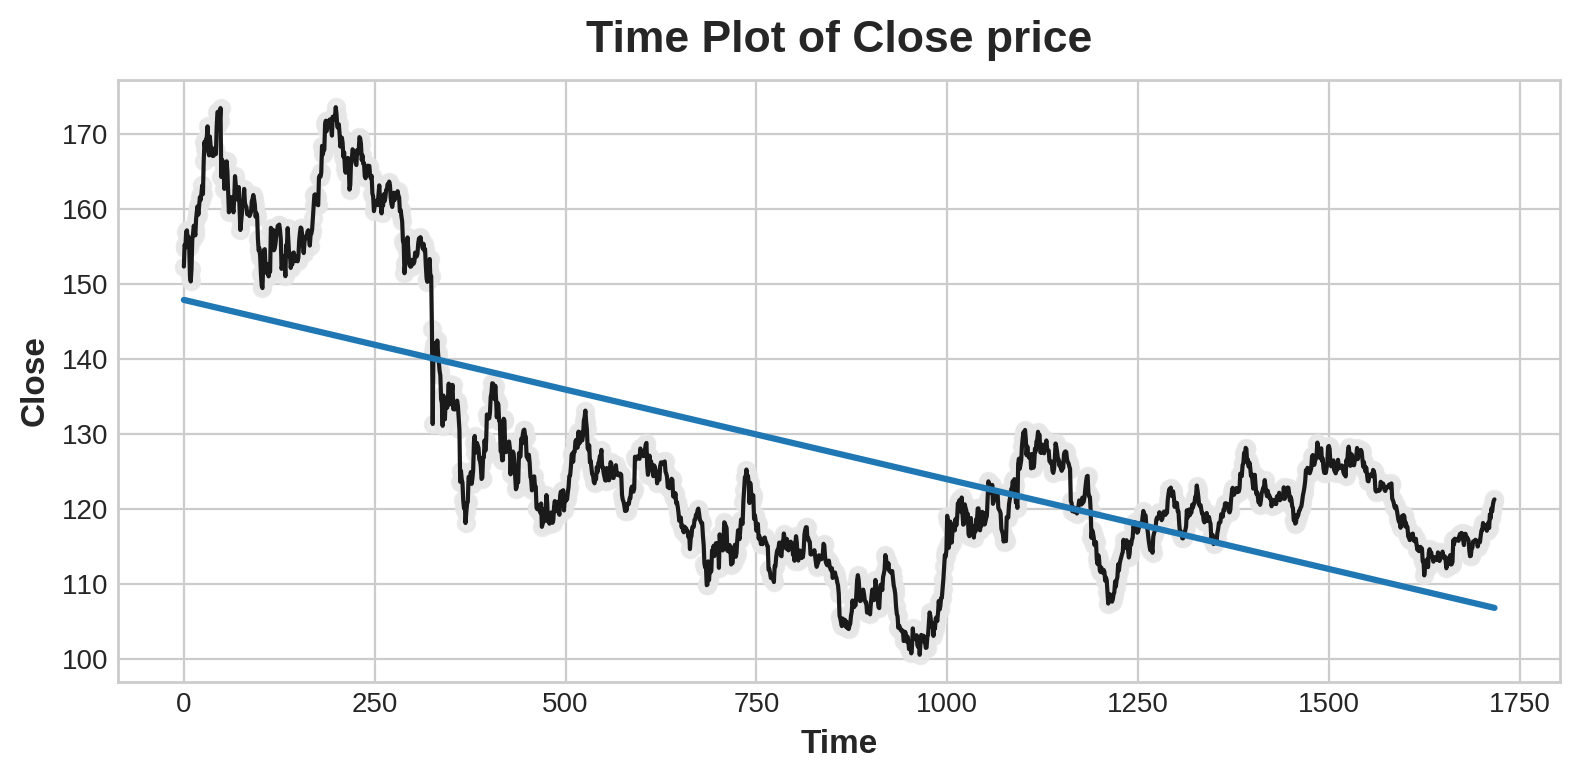

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(8, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Close', data=df, color='0.1')
ax = sns.regplot(x='Time', y='Close', data=df, ci=None, scatter_kws=dict(color='0.9'))
ax.set_title('Time Plot of Close price');

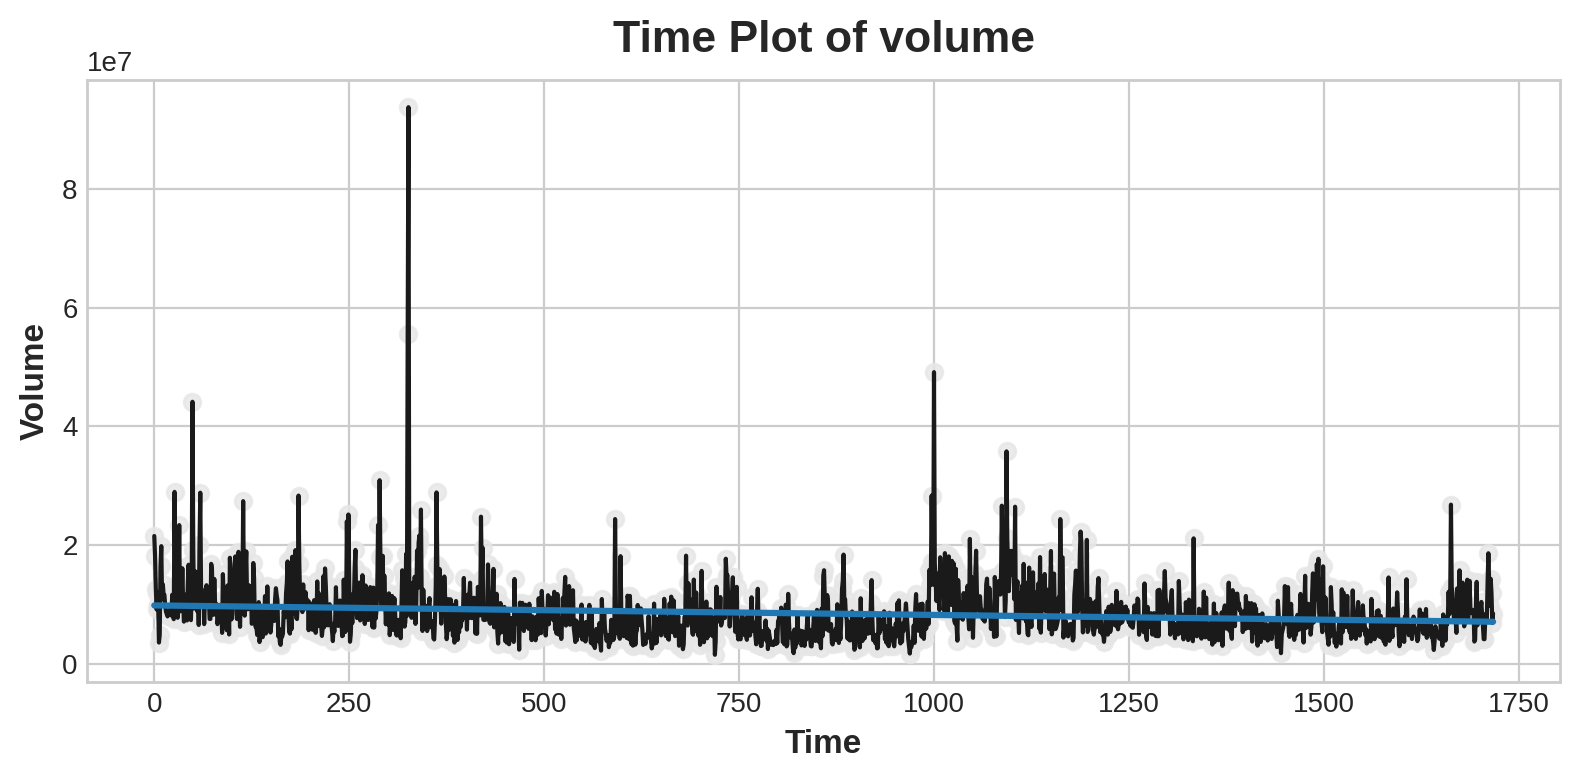

In [19]:
fig, ax = plt.subplots()
ax.plot('Time', 'Volume', data=df, color='0.1')
ax = sns.regplot(x='Time', y='Volume', data=df, ci=None, scatter_kws=dict(color='0.9'))
ax.set_title('Time Plot of volume');

In [20]:
x = df.loc[:, ['Time']]
y = df.loc[:, 'Volume']

In [24]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [25]:
y_pred = pd.Series(model.predict(x), index=x.index)

In [26]:
y_pred

0       9.822515e+06
1       9.820912e+06
2       9.819309e+06
3       9.817706e+06
4       9.816103e+06
            ...     
1713    7.076551e+06
1714    7.074948e+06
1715    7.073345e+06
1716    7.071742e+06
1717    7.070139e+06
Length: 1718, dtype: float64

<ipython-input-43-abd599a35d9e>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


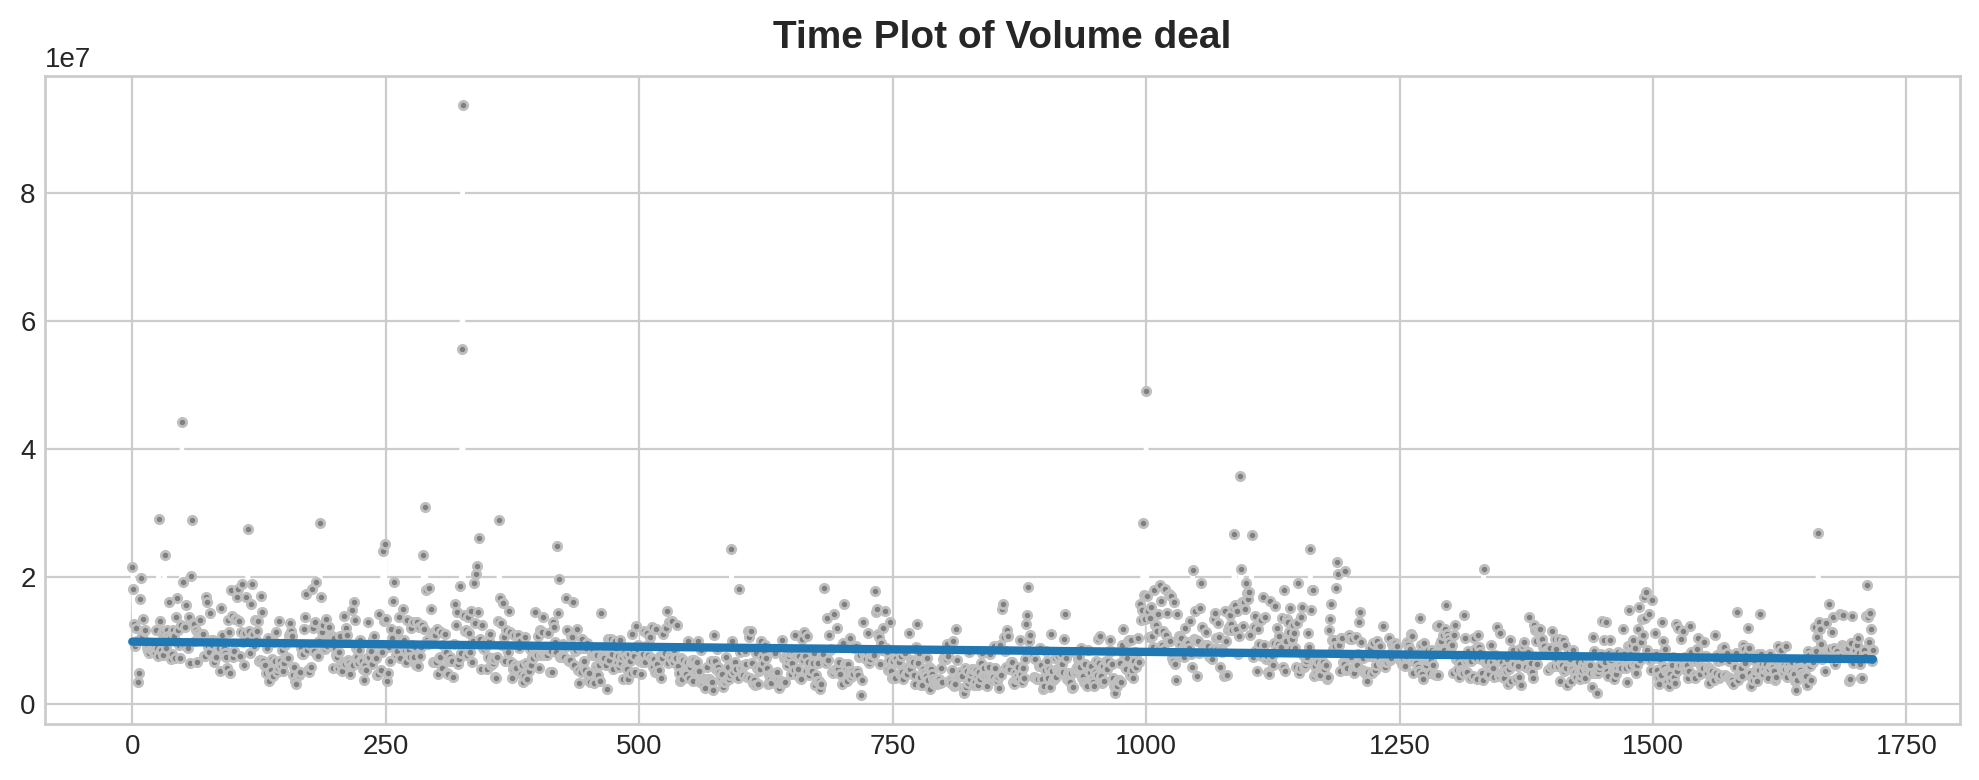

In [43]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(10, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="1.0",
    style=".-",
    markeredgecolor="0.75",
    markerfacecolor="0.5",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Volume deal');